## 用真实值评估聚类

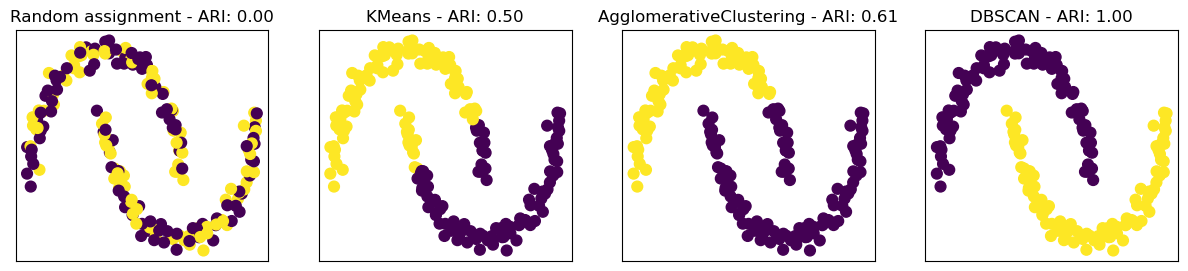

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
import os
os.environ["OMP_NUM_THREADS"] = "1"

#忽略警告
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 生成月牙形数据集
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 创建一个1行4列的子图，用于显示不同聚类算法的结果
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 列出要使用的算法
algorithms = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配的结果
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap='viridis', s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制各个聚类算法的结果
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

plt.show()


不能使用accuracy_score

## 在没有真实值的情况下评估聚类

### 轮廓系数(silhouette)

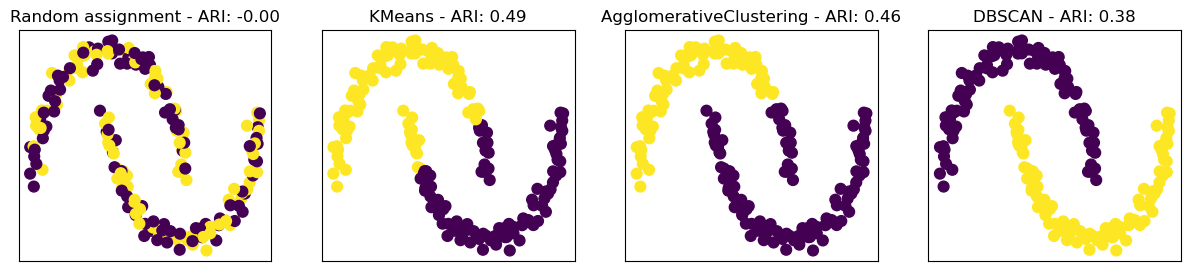

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "1"

#忽略警告
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# 生成月牙形数据集
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 将数据缩放成平均值为0、方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 创建一个1行4列的子图，用于显示不同聚类算法的结果
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 列出要使用的算法
algorithms = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# 创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 绘制随机分配的结果
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap='viridis', s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 绘制各个聚类算法的结果
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

plt.show()
